In [ ]:
import pandas as pd
import numpy as np
import math as ma
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
import tensorflow as tf
import warnings
import seaborn as sn

import nltk

from wordcloud import WordCloud, STOPWORDS

from sklearn.metrics import cohen_kappa_score

warnings.filterwarnings('ignore')
plt.style.use('ggplot')

In [ ]:
!pip install pattern

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 61.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.1/88.1 KB 11.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.1/81.1 KB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 86.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 96.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 348.4/348.4 KB 38.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.6/100.6 KB 14.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 71.3 MB/s eta 0:00:00
  Created wheel for pattern: filename=Pattern-3.6-py3-none-any.whl size=22332722 sha256=77ea0f0

In [ ]:
!pip install matplotlib --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 85.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 965.4/965.4 KB 63.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.0/300.0 KB 36.8 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2


In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 31.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 19.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 39.4 MB/s eta 0:00:00


In [ ]:
nltk.download('omw-1.4')
nltk.download('vader_lexicon')
nltk.download('punkt') # For TextBlob
nltk.download('averaged_perceptron_tagger') # For TextBlob
nltk.download('brown') # For TextBlob

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.


True

In [ ]:
# Loading the merged dataset. For now keeping the encoding to ISO-8859-1 . Will have to look into it later
df = pd.read_csv('sample_text_rating_Merged.csv', encoding='ISO-8859-1')

In [ ]:
# Making a copy of the df to collate the results
sentiment_df = df.copy

In [ ]:
# First 5 rows of the df
df.head()

,comment,rating
0,parking is easy and the parking fee is reasonable,5
1,this is one of the best aquarium,5
2,i was blown away by the exhibits.,5
3,everything was so cool,4
4,definitely worth seeing,4


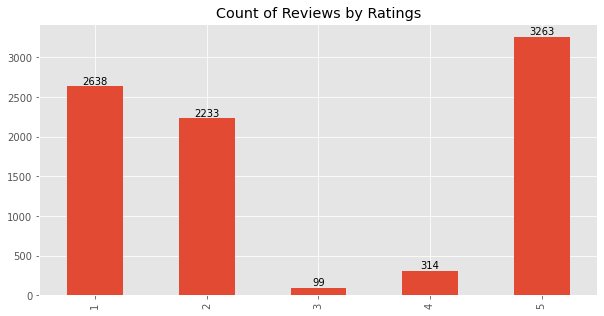

In [ ]:
# Plotting the distribution of the ratings in the current dataset
ax = df.rating.value_counts().sort_index().plot(kind='bar',title = 'Count of Reviews by Ratings',figsize = (10,5))
ax.set_label('Review Stars')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

In [ ]:
sentences = df.comment
ratings = df.rating

In [ ]:
def get_sentiment(sentence,method):
    # Get the Sentiment Score
    if method == 'sia':
      sentiment_Score = sia.polarity_scores(sentence)['compound']
    elif method == 'pattern': 
      sentiment_Score = pattern_sentiment(sentence)[0]
    elif method == 'blob':
      sentiment_Score = get_polarity_blob(sentence)
    elif method == 'distilbert':
      sentiment_Score = sentimentAnalysis_pipeline(sentence)
    # Map the sentiment score to a 5-point scale
    if sentiment_Score >= 0.5:
        return 5
    elif sentiment_Score >= 0.3:
        return 4
    elif sentiment_Score > -0.0:
        return 3
    elif sentiment_Score > -0.3:
        return 2
    else:
        return 1

In [ ]:
def get_sentiment_AJ(sentence,method):
    # Get the Sentiment Score
    if method == 'sia':
      sentiment_Score = sia.polarity_scores(sentence)['compound']
    elif method == 'pattern': 
      sentiment_Score = pattern_sentiment(sentence)[0]
    elif method == 'blob':
      sentiment_Score = get_polarity_blob(sentence)
    elif method == 'distilbert':
      sentiment_Score = sentimentAnalysis_pipeline(sentence)
    # Map the sentiment score to a 5-point scale
    return round(sentiment_Score*2 + 3,0)

In [ ]:
def get_Model_Ratings(sentences,method):
  model_Ratings = list()
  for i in range(sentences.size):
    model_Ratings.append(get_sentiment(sentences[i],method))
  return model_Ratings

In [ ]:
def get_Model_Ratings_AJ(sentences,method):
  model_Ratings = list()
  for i in range(sentences.size):
    model_Ratings.append(get_sentiment_AJ(sentences[i],method))
  return model_Ratings

In [ ]:
def get_polarity_blob(sentence):
  blob_sentence = TextBlob(sentence)
  return round(blob_sentence.sentiment.polarity,2)

predicted = model_Ratings

actual = test_Ratings

In [ ]:
def return_Confusion_Matrix(actual,predicted):
  confusion_matrix = metrics.confusion_matrix(actual,predicted)
  plt.figure(figsize = (10,7))
  sn.heatmap(confusion_matrix,annot=True,fmt='g',cmap = 'Greens')
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  return confusion_matrix

In [ ]:
def get_performance_metrics(actual,predicted):
  # Accuracy
  accuracy = metrics.accuracy_score(actual,predicted)
  print("Accuracy: {:.2f}".format(accuracy))
  # F1 score 
  f1_score = metrics.f1_score(actual,predicted,average='weighted')
  print("F1 Score : {:.2f}".format(f1_score))
  # Precision
  precision = metrics.precision_score(actual,predicted,average='weighted')
  print("Precision : {:.2f}".format(precision))
  #recall
  recall_macro = metrics.recall_score(actual,predicted,average='macro')
  recall_micro = metrics.recall_score(actual,predicted,average='micro')
  # reference : https://datascience.stackexchange.com/questions/15989/micro-average-vs-macro-average-performance-in-a-multiclass-classification-settin
  print('Recall Macro : {:.2f}'.format(recall_macro))
  print('Recall Micro : {:.2f}'.format(recall_micro))

  #calculate Cohen's Kappa
  cohenkappa_score = cohen_kappa_score(actual, predicted)
  #reference : https://vitalflux.com/cohen-kappa-score-python-example-machine-learning/
  print("cohen_kappa_score : {:.2f}".format(cohenkappa_score))

# Sentiment Intensity Analyzer

VADER calculates the text sentiment and returns the probability of a given input sentence to be positive, negative, or neural. The tool can analyze data from all sorts of social media platforms, such as Twitter and Facebook. 

Here are some of the main features of VADER: 



1.   VADER model does not require training data
2.   It understands sentiment of text containing emoticons, slangs,conjunctions, etc.
3.   VADER is good for social media text
4.   It is an Open-source library

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer

In [ ]:
# Creating a sentimentintensityanalyzer object
sia = SentimentIntensityAnalyzer()

In [ ]:
sentence = 'this is my favorite place.'
method = 'sia'
get_sentiment(sentence,method)

4

In [ ]:
sentence = 'this is my favorite place.'
method = 'pattern'
get_sentiment(sentence,method)

5

In [ ]:
sentence = 'this is my favorite place.'
method = 'sia'
get_sentiment_AJ(sentence,method)

4.0

In [ ]:
sentence = 'this is my favorite place.'
method = 'pattern'
get_sentiment_AJ(sentence,method)

4.0

In [ ]:
sia_ratings = get_Model_Ratings(sentences,'sia')

array([[ 922, 1244,  157,  200,  115],
       [ 488, 1164,  138,  260,  183],
       [   7,   53,   10,   19,   10],
       [   3,   85,   36,  102,   88],
       [  16,  509,  127,  553, 2058]])

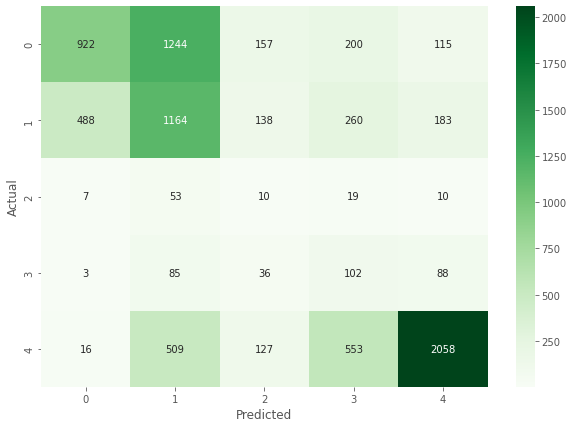

In [ ]:
return_Confusion_Matrix(ratings,sia_ratings)

In [ ]:
get_performance_metrics(ratings,sia_ratings)

Accuracy: 0.50
F1 Score : 0.54
Precision : 0.62
Recall Macro : 0.39
Recall Micro : 0.50
cohen_kappa_score : 0.32


## Interpretation of the Kappa Score



*   score < 0            :   Less than chance agreement
*   0.01 < score < 0.2   :   Slight agreement
*   0.21 - 0.4           :   Fair agreement
*   0.41 - 0.6           :   Moderate agreement
*   0.61 - 0.8           :   Substantial agreement
*   0.81 - 0.99          :   Almost perfect agreement

In [ ]:
sia_ratings_AJ = get_Model_Ratings_AJ(sentences,'sia')

array([[  86, 1000, 1192,  330,   30],
       [  21,  577, 1150,  450,   35],
       [   0,   12,   53,   32,    2],
       [   0,   12,  106,  187,    9],
       [   0,   24,  584, 2300,  355]])

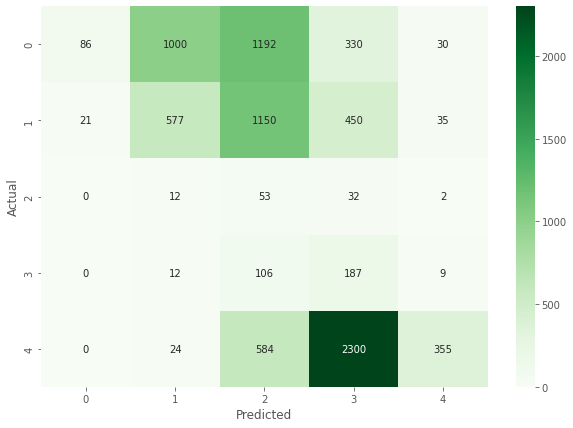

In [ ]:
return_Confusion_Matrix(ratings,sia_ratings_AJ)

In [ ]:
get_performance_metrics(ratings,sia_ratings_AJ)

Accuracy: 0.15
F1 Score : 0.18
Precision : 0.66
Recall Macro : 0.31
Recall Micro : 0.15
cohen_kappa_score : 0.06


# Patterns Library

In [ ]:
from pattern.en import parse
from pattern.en import pprint

In [ ]:
pprint(parse('Hello I am John, I work at the bank.', relations=True,Tokenize = True, lemmata=True))

          WORD   TAG    CHUNK   ROLE   ID     PNP    LEMMA   
                                                             
         Hello   UH     -       -      -      -      hello   
             I   PRP    NP      SBJ    1      -      i       
            am   VBP    VP      -      1      -      be      
          John   NNP    NP      OBJ    1      -      john    
             ,   ,      -       -      -      -      ,       
             I   PRP    NP      SBJ    2      -      i       
          work   VBP    VP      -      2      -      work    
            at   IN     PP      -      -      PNP    at      
           the   DT     NP      -      -      PNP    the     
          bank   NN     NP ^    -      -      PNP    bank    
             .   .      -       -      -      -      .       


We can see that all the words have been tokenized and they have been identified. For example, “am” is tagged as a verb and its lemma is “be”. “Bank” is a noun and its lemma is unchanged, as “bank”. The role of “I” as a subject is also identified. The next “I” and “John” are objects. So, we can see that the parse function really does a great job at identifying the roles of all the tokens of a word.

In [ ]:
from pattern.en import sentiment as pattern_sentiment

The function in Pattern returns polarity and the subjectivity of a given text.

The Polarity result ranges from highly Positive to highly negative (1 to -1)

The subjectivity ranges from 0(Objective) to 1(Subjective).

In [ ]:
print(pattern_sentiment('this is my favorite place.'))

(0.5, 1.0)


In [ ]:
print(pattern_sentiment('What a terrible place'))

(-1.0, 1.0)


In [ ]:
pattern_ratings = get_Model_Ratings(sentences,'pattern')

array([[ 642, 1350,  427,  105,  114],
       [ 278, 1158,  483,  137,  177],
       [   5,   59,   13,   10,   12],
       [   7,   77,   57,   92,   81],
       [  24,  442,  350,  591, 1856]])

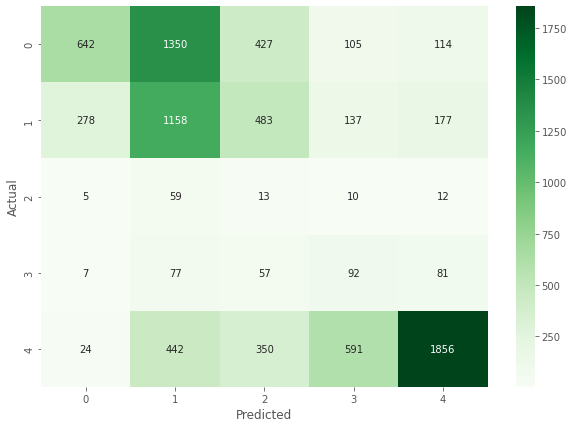

In [ ]:
return_Confusion_Matrix(ratings,pattern_ratings)

In [ ]:
get_performance_metrics(ratings,pattern_ratings)

Accuracy: 0.44
F1 Score : 0.49
Precision : 0.63
Recall Macro : 0.35
Recall Micro : 0.44
cohen_kappa_score : 0.27


In [ ]:
pattern_ratings_AJ = get_Model_Ratings_AJ(sentences,'pattern')

array([[ 204,  505, 1658,  254,   17],
       [  41,  300, 1512,  353,   27],
       [   2,    5,   70,   22,    0],
       [   0,   10,  130,  159,   15],
       [   1,   37,  688, 1694,  843]])

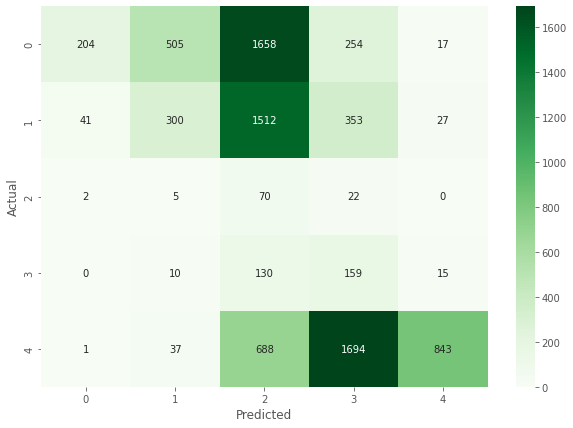

In [ ]:
return_Confusion_Matrix(ratings,pattern_ratings_AJ)

In [ ]:
get_performance_metrics(ratings,pattern_ratings_AJ)

Accuracy: 0.18
F1 Score : 0.25
Precision : 0.70
Recall Macro : 0.34
Recall Micro : 0.18
cohen_kappa_score : 0.10


# BERT

* BERT (Bidirectional Encoder Representations from Transformers) is a top machine learning model used for NLP tasks, including sentiment analysis. Developed in 2018 by Google, the library was trained on English WIkipedia and BooksCorpus, and it proved to be one of the most accurate libraries for NLP tasks. 

Because BERT was trained on a large text corpus, it has a better ability to understand language and to learn variability in data patterns. 

Here are some of the main features of BERT: 

1. Easy to fine tune
2. Wide range of NLP tasks, including sentiment analysis
3. Trained on a large corpus of unlabeled text
4. Deeply bidirectional model


# TextBlob

TextBlob is another great choice for sentiment analysis. The simple Python library supports complex analysis and operations on textual data. For lexicon-based approaches, TextBlob defines a sentiment by its semantic orientation and the intensity of each word in a sentence, which requires a pre-defined dictionary classifying negative and positive words. The tool assigns individual scores to all the words, and a final sentiment is calculated. 

TextBlob returns polarity and subjectivity of a sentence, with a Polarity range of negative to positive. The library’s semantic labels help with analysis, including emoticons, exclamation marks, emojis, and more. 

Here are some of the main features of TextBlob: 

* Simple Python library
* Supports complex analysis and operations on textual data
* Assigns individual sentiment scores
* Returns polarity and subjectivity of sentence

In [ ]:
from textblob import TextBlob

In [ ]:
text = '''
The titular threat of The Blob has always struck me as the ultimate movie
monster: an insatiably hungry, amoeba-like mass able to penetrate
virtually any safeguard, capable of--as a doomed doctor chillingly
describes it--"assimilating flesh on contact.
Snide comparisons to gelatin be damned, it's a concept with the most
devastating of potential consequences, not unlike the grey goo scenario
proposed by technological theorists fearful of
artificial intelligence run rampant.
'''

In [ ]:
blob = TextBlob(text)
#blob.tags           # [('The', 'DT'), ('titular', 'JJ'),
                    #  ('threat', 'NN'), ('of', 'IN'), ...]

#blob.noun_phrases   # WordList(['titular threat', 'blob',
                    #            'ultimate movie monster',
                    #            'amoeba-like mass', ...])

In [ ]:
for sentence in blob.sentences:
    print(round(sentence.sentiment.polarity,2))

0.06
-0.34


In [ ]:
blob_ratings = get_Model_Ratings(sentences,'blob')

array([[ 645, 1346,  420,  109,  118],
       [ 278, 1146,  482,  146,  181],
       [   5,   59,   13,   10,   12],
       [   7,   77,   57,   90,   83],
       [  24,  442,  348,  592, 1857]])

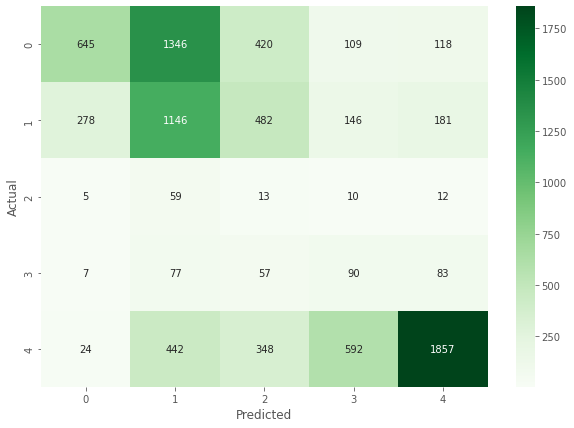

In [ ]:
return_Confusion_Matrix(ratings,blob_ratings)

In [ ]:
get_performance_metrics(ratings,blob_ratings)

Accuracy: 0.44
F1 Score : 0.49
Precision : 0.62
Recall Macro : 0.35
Recall Micro : 0.44
cohen_kappa_score : 0.27


In [ ]:
blob_ratings_AJ = get_Model_Ratings_AJ(sentences,'blob')

array([[ 204,  501, 1653,  262,   18],
       [  41,  300, 1496,  369,   27],
       [   2,    5,   70,   22,    0],
       [   0,   10,  130,  159,   15],
       [   1,   37,  686, 1696,  843]])

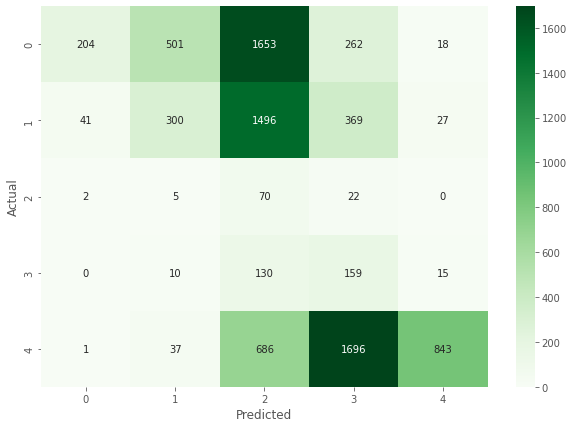

In [ ]:
return_Confusion_Matrix(ratings,blob_ratings_AJ)

In [ ]:
get_performance_metrics(ratings,blob_ratings_AJ)

Accuracy: 0.18
F1 Score : 0.25
Precision : 0.70
Recall Macro : 0.34
Recall Micro : 0.18
cohen_kappa_score : 0.10


# Transformers



## DistilBERT

In [ ]:
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from scipy.special import softmax

In [ ]:
from transformers import pipeline

In [ ]:
model_path = 'distilbert-base-uncased-finetuned-sst-2-english'
sentimentAnalysis_pipeline_distilbert = pipeline("sentiment-analysis",model = model_path, tokenizer = model_path)

In [ ]:
# The pipe line also loads the same models listed below :
# Load the pre-trained tokenizer and model : using default distilbert by google : https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english
#tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased-finetuned-sst-2-english")
#model = AutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased-finetuned-sst-2-english")

# Trained in Stanford Sentiment Treebank Corpus (SST-2) : Manually tagged binary sentiment classifier , trained mostly using movie reviews. 91.3 % accuracy. 92% normal Bert

## Limitations 

The model could produce biased predictions that target underrepresented populations.

For instance, for sentences like "This film was filmed in COUNTRY" , the  classification model will give radically different probabilities for the positive label depending on the country (0.89 if the country is France, but 0.08 if the country is Afghanistan) when nothing in the input indicates such a strong semantic shift.

Map of positive probabilities per country. : https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english/resolve/main/map.jpeg

We need to thoroughly probe these aspects on their use-cases in order to evaluate the risks of this model. 

We can look into the following bias evaluation datasets as a place to start: 

WinoBias, WinoGender, Stereoset.

In [ ]:
# Testing 
sentence = "I am neutral"
sentiment = sentimentAnalysis_pipeline_distilbert(sentence)

print(sentiment)

# haha

[{'label': 'NEGATIVE', 'score': 0.9988877177238464}]


In [ ]:
# Define the input sentence
sentence = "we took to toddlers who jumped and shouted with excitement throughout  the entire place nice job"
sentiment = sentimentAnalysis_pipeline_distilbert(sentence)

print(sentiment)
scores = sentiment[0].detach().numpy()

scores = softmax(scores)

[{'label': 'POSITIVE', 'score': 0.9997140765190125}]


AttributeError: ignored

In [ ]:
scores = sentiment[0]
scores

{'label': 'POSITIVE', 'score': 0.9997140765190125}

## RoBERTa

Reference : https://huggingface.co/cardiffnlp/twitter-roberta-base-sentiment-latest

In [ ]:
# Using Roberta
model_path = 'cardiffnlp/twitter-roberta-base-sentiment-latest'
sentimentAnalysis_pipeline_roberta = pipeline("sentiment-analysis",model = model_path, tokenizer = model_path)

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
sentence = "we took to toddlers who jumped and shouted with excitement throughout  the entire place nice job"
sentiment = sentimentAnalysis_pipeline_roberta(sentence)

print(sentiment)

[{'label': 'positive', 'score': 0.9838672876358032}]


In [ ]:
# Testing 
sentence = "I am neutral"
sentiment = sentimentAnalysis_pipeline_roberta(sentence)

print(sentiment)

[{'label': 'neutral', 'score': 0.7572426199913025}]


# sbcBI/sentiment_analysis

In [ ]:
model_path = 'sbcBI/sentiment_analysis'
sentimentAnalysis_pipeline_sbcBI = pipeline("sentiment-analysis",model = model_path, tokenizer = model_path)

In [ ]:
# Testing 
sentence = "I am neutral"
sentiment = sentimentAnalysis_pipeline_sbcBI(sentence)

print(sentiment)

# haha

[{'label': 'LABEL_2', 'score': 0.7955884337425232}]


# Bert base 
fabriceyhc/bert-base-uncased-amazon_polarity

reference : https://huggingface.co/fabriceyhc/bert-base-uncased-amazon_polarity

In [ ]:
model_path = 'fabriceyhc/bert-base-uncased-amazon_polarity'
sentimentAnalysis_pipeline_bertbase = pipeline("sentiment-analysis",model = model_path, tokenizer = model_path)

In [ ]:
# Testing 
sentence = "I am neutral"
sentiment = sentimentAnalysis_pipeline_bertbase(sentence)

print(sentiment)

[{'label': 'negative', 'score': 0.9948274493217468}]


In [ ]:
# Import libraries
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
#from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Define a custom estimator that wraps around SentimentIntensityAnalyzer
class VaderSentimentEstimator:

  def __init__(self, lexicon=None, threshold=0):
    # Initialize the sentiment analyzer with a custom lexicon if given
    if lexicon:
      self.sia = SentimentIntensityAnalyzer(lexicon_file=lexicon)
    else:
      self.sia = SentimentIntensityAnalyzer()
    # Set the threshold for classifying the sentiment
    self.threshold = threshold
  
  def fit(self, X, y):
    # No training is needed, just return self
    return self
  
  def predict(self, X):
    # Predict the sentiment labels based on the compound score and the threshold
    y_pred = []
    for text in X:
      score = self.sia.polarity_scores(text)["compound"]
      if score > self.threshold:
        y_pred.append("positive")
      elif score < -self.threshold:
        y_pred.append("negative")
      else:
        y_pred.append("neutral")
    return y_pred

# Load some sample data (tweets.csv)
#df = pd.read_csv("tweets.csv")
X = sentences
y = ratings

# Define the parameter grid for grid search
param_grid = {
  "lexicon": [None, "custom_lexicon.txt"], # Try with and without a custom lexicon
  "threshold": [0, 0.05, 0.1, 0.2] # Try different thresholds for classifying the sentiment
}

# Create a grid search object with VaderSentimentEstimator and accuracy as the scoring function
grid_search = GridSearchCV(VaderSentimentEstimator(), param_grid, scoring="accuracy", cv=5)

# Fit the grid search on the data
grid_search.fit(X, y)

# Print the best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Predict on new data using the best estimator
X_new = ["I love this airline", "I hate this airline", "This airline is okay"]
y_new = grid_search.best_estimator_.predict(X_new)
print("New predictions:", y_new)

TypeError: ignored